# [기본]

## 0. 일반적인 샘플 수에 따른 시간복잡도 허용 

| 시간복잡도              | 최대 n 허용 범위 (안전한 상한)    | 예시                     |
| ------------------ | ---------------------- | ---------------------- |
| $O(1), O(log(n))$ | $10^8$ 이상도 가능             | 이진 탐색, 해시 조회 등         |
| $O(n)$             | 약 $10^7$ 이하               | 단순 순회, 슬라이딩 윈도우 등      |
| $O(nlog(n))$       | 약 $10^6$ 이하               | 정렬, 힙 등       |
| $O(n^2)$            | 약 $5,000\sim10,000$ 이하 | 2중 루프 등 |
| $O(n^3)$ 이상       | $500$ 이하                 | 3중 루프 등       |

## 1. dir - 자료구조 메서드 이름 기억 안날 때

In [ ]:
# set에 대한 메서드
print(dir(set([])))

# ['__and__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', 
# '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__iand__', 
# '__init__', '__init_subclass__', '__ior__', '__isub__', '__iter__', '__ixor__', '__le__', '__len__', 
# '__lt__', '__ne__', '__new__', '__or__', '__rand__', '__reduce__', '__reduce_ex__', '__repr__', '__ror__', 
# '__rsub__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__xor__', 
# 'add', 'clear', 'copy', 'difference', 'difference_update', 'discard', 'intersection', 'intersection_update', 
# 'isdisjoint', 'issubset', 'issuperset', 'pop', 'remove', 'symmetric_difference', 'symmetric_difference_update', 
# 'union', 'update']

## 2. 빠른 입출력

- 입출력방식만 기본방식에서 빠른 입출력 방식으로 바꿔도 시간 효율성 문제가 해결되는 경우가 종종 있다.

In [ ]:
import sys

# input()대신 빠른입력
x = sys.stdin.readline().rstrip()   # 입력 끝에 개행 문자 \n이 포함되므로, 필요하다면 .strip()으로 제거
# print()대신 빠른출력
sys.stdout.write(x + "\n")          # print()와 달리 줄바꿈을 자동으로 해주지 않으므로 필요하다면 끝에 개행문자 \n을 붙여줌


# 혹은 기존처럼 input(), print()명령어를 쓰면서 자동으로 빠른입출력으로 쓰고 싶다면 다음을 설정
input = sys.stdin.readline
print = sys.stdout.write
# 이제 기존처럼 input(), print()이용
x = input().rstrip()
print(x + "\n")

## 3. lambda

### 3-1. `map(lambda, iterable)`
- 목적: `iterable`의 각 요소를 변환

> `조건문`을 lambda 함수나 map 함수와 결합가능      
> * 조건문 표현식에 콜론(:) 사용하지 않음     
> * if를 사용했다면 `반드시 else 사용`해야 함     
> * `elif 사용 불가`하고 if를 연속적으로 사용해야 함      

```python
lambda 매개변수들: 매개변수 식1(조건식 참일때) if 조건식 else 식2(조건식 거짓일때)
lambda 매개변수들: 매개변수 식1(조건식1 참일때) if 조건식1 else 식2(조건식2 참일때) if 조건식2 else 식3(조건식1,2 모두 거짓일때)
```

In [ ]:
nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

squares = list(map(lambda x: x ** 2, nums))
print(squares)  # [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

# 조건문 사용
print(list(map(lambda x: str(x) if x % 3 == 0 else x, nums)))
# [1, 2, '3', 4, 5, '6', 7, 8, '9', 10]

# 조건문 여러개도 결합 가능
print(list(map(lambda x: str(x) if x % 3 == 0 else float(x) if x % 5 == 0 else x+10, nums)))
# [11, 12, '3', 14, 5.0, '6', 17, 18, '9', 10.0]

In [ ]:
# 프로그램(함수) 작성
img_function = lambda files: [i for i in files if i[-4:] in ['.jpg','.png']]

# 입력
files = ['font', '1.png', '10.jpg', '11.gif', '2.jpg', '3.png', 'table.xslx', 'spec.docx']
# 출력
print(img_function(files))      # ['1.png', '10.jpg', '2.jpg', '3.png']

# --- #

# 같은 문제를 map을 써서 풀어본다면,

# img_function = lambda x: x if x[-4:] in ['.png','.jpg']               # else 가 없으면 에러
# img_function = lambda x: x if x[-4:] in ['.png','.jpg'] else pass     # lambda 에서는 pass를 쓸 수 없다.
img_function = lambda x: x if x[-4:] in ['.png','.jpg'] else None
files = ['font', '1.png', '10.jpg', '11.gif', '2.jpg', '3.png', 'table.xslx', 'spec.docx']

print(list(map(img_function, files)))       # [None, '1.png', '10.jpg', None, '2.jpg', '3.png', None, None]

# None을 제외한 파일명들만 나오게 하려면 filter함수 사용

### 3-2. `filter(lambda, iterable)`
- 목적: 조건을 만족하는 요소만 걸러냄
- map과 동일한 구조지만 `조건식이 참인 입력값들만 출력`

```python
even_num = lambda x:x%2==0
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print(list(map(even_num, nums)))    # [True, False, True, False, True, False, True, False, True, False]
print(list(filter(even_num, nums))) # [0, 2, 4, 6, 8]
```

In [ ]:
nums = [1, 2, 3, 4, 5, 6]
evens = list(filter(lambda x: x % 2 == 0, nums))
print(evens)  # [2, 4, 6]

In [ ]:
words = ["Hello", "world", "Python", "is", "Awesome"]

# 길이 ≥ 5인 단어를 소문자로 변환
result = list(map(lambda w: w.lower(), filter(lambda w: len(w) >= 5, words)))
print(result)  # ['hello', 'world', 'python', 'awesome']

In [ ]:
# 참고: 가능하다면 map/filter + lambda 보다는 list comprehension이 훨씬 가독성 좋고 빠르다.
data = [8, 3, 2, 10, 15, 7, 1, 9, 0, 11]

print(list(filter(lambda x: x>5 and x<10, data)))   # [8, 7, 9]
print([i for i in data if i>5 and i<10])    # [8, 7, 9]

### 3-3. `reduce(lambda, iterable)`
- 목적: `iterable`을 누적하여 하나의 값으로 축소


In [ ]:
from functools import reduce

nums = [1, 2, 3, 4]
product = reduce(lambda x, y: x * y, nums)
print(product)  # 24

## 4. filter

### 4-1. filter 함수 사용

In [ ]:
nums = [3, 5, 4, 8, 9]
nums = list(filter(lambda n: n%2 !=0, nums))

print(nums) # [3, 5, 9]

### 4-2. List Comprehension 사용

* 참고: List Comprehension은 오직 '리스트를 생성'할때만 쓰인다.
* 리스트 뿐만 아니라 Tuple, Dict, Set Comprehension도 가능

In [ ]:
# 필터링 (if를 뒤쪽에 쓰는 경우)
nums = [3, 5, 4, 8, 9]
nums = [n for n in nums if n%2 != 0]

print(nums) # [3, 5, 9]

# 값 변환 (if-else를 앞쪽에 쓰는 경우)
nums = [1, -2, 3, -4]
nums = [i if i>0 else 0 for i in nums]		

print(nums) # [1, 0, 3, 0]

# 다중 조건(elif를 쓸 수 없으므로 중첩된 조건식으로 대체)
lst = [1, -2, 0, 3, 0, -4]
result = [1 if x > 0 else 0 if x == 0 else -1 for x in lst]

print(result)   # [1, -1, 0, 1, 0, -1]

## 5. enumerate
Iterable을 입력 받고 for쓰면서도 index 살리고 싶을 때 사용한다

In [ ]:
for k, v in enumerate("abcde"):
    print(f'{k}. {v}')

# 0. a
# 1. b
# 2. c
# 3. d
# 4. e

## 6. 반올림
- **중요!!! round()는 사사오입이 아니라 오사오입이다.**
- 사사오입이 필요한 경우, int(x+0.5)를 활용하자.

In [ ]:
print(round(0.4))   # 0
print(round(0,5))   # 0
print(round(0.6))   # 1

print(int(0.49 + 0.5))  # 0
print(int(0.5 + 0.5))   # 1
print(int(1 + 0.5))     # 1
print(int(0.51 + 0.5))  # 1

## 7. 음수 나머지 연산

In [ ]:
print(-1 % 10000)   # 9999
print(-1 % 1)   # 0
print(-1 % 5)   # 4

## 8. 해시 테이블
- `hash()`는 immutable 객체(한 번 만들면 안에 있는 값을 바꿀 수 없는 객체)를 입력받아 해시값(정수)을 반환하는 함수
- 해시 테이블은 `key → hash(key) → index` 과정을 통해 데이터를 저장/검색하는 구조
- `dict`, `set` 등의 내부 동작에서 키 검색을 빠르게 하기 위해 사용됨
- 리스트나 딕셔너리처럼 mutable 객체는 해시 불가
- 평균 시간 복잡도: 삽입/검색/삭제 모두 O(1) 
- 예) `x in list`의 시간 복잡도는 $O(N)$ vs. `x in set`의 시간 복잡도는 $O(1)$

- **결론**: 검색/삽입/삭제를 빠르게 하고 싶을 때 → 무조건 `dict`나 `set`을 먼저 떠올려야 함
    * `dict`: 특정한 데이터의 등장 횟수를 셀 때 효과적으로 사용할 수 있다.  
    * `set` : 특정한 데이터가 등장한 적 있는지 체크할 때 효과적으로 사용된다.

>- 코딩 테스트에서 해시 테이블이 쓰이는 대표 상황    
>
>| 문제 유형    | 예시                       |
>| -------- | --------------------------------- |
>| 중복 제거    | `set()` 사용                        |
>| 등장 횟수 세기 | `dict`, `collections.Counter()`   |
>| 빠른 탐색    | `x in dict`, `x in set`           |
>| 매핑 저장    | `name → 점수`, `문자열 → 숫자`, `좌표 → 값` |

In [ ]:
print(hash("apple"))     # 문자열
print(hash(1234))        # 정수
print(hash((1, 2, 3)))   # 튜플 (mutable 자료형인 리스트는 불가)

# dict 예시1 (해시 테이블 기반 동작)
d = {}
d["apple"] = 10
print(d["apple"])  # 10

# dict 예시2 
visited = {}
visited[(2, 3)] = True

if (2, 3) in visited:
    print("이미 방문한 좌표입니다.")

# [문자열과 숫자]

## 1. 숫자 각 자리의 합

In [ ]:
I = 1592

ans = sum(map(int, str(I)))
print(ans)  # 17

## 2. 입력이 문자인지 숫자인지 확인

In [ ]:
S = input()

# 0을 포함한 양의 정수인지
print(S.isdigit())
# 전체 정수인지
print(S.lstrip('-').isdigit())
# 실수인지
try: float(S)
except: pass

## 3. format

In [ ]:
format(1234567, ",")    # 자리수 쉼표: 1,234,567
format(1234567, ".4f")  # 소수점 아래 자리 수: 1234567.0000

format(1234567, "x")    # 16진수 표기: 12d687
format(1234567, "o")    # 8진수 표기: 4553207
format(1234567, "e")    # 지수표기: 1.234567e+06
format(1234567, 'b')    # 2진수 표기: 100101101011010000111

format(1234567, "0>10") # 총 10칸(문자열 기준), 왼쪽을 0으로 채우기: 0001234567

# 응용
format(1234567.12, "0>20,.6f")  # 소수점 6자리까지 표현, 총 20칸, 왼쪽은 0으로 채우고 자리수 쉼표 표시: 00001,234,567.120000

# 응용: 시간 자리 2칸 표시
hour = format(9, "0>2")
minute = format(43, "0>2")
second = format(2, "0>2")
print(f'{hour}:{minute}:{second}')  # 09:43:02

## 4. 진수변환

In [ ]:
# `정수`를 2진수 문자열로 변환
n = 13
binary_str = bin(n)
print(binary_str)       # 0b1101
print(binary_str[2:])   # 접두사를 제외하고 숫자의 문자열만 출력

# `문자열`을 n진수 정수로 변환: int(str, n)
S = '23043'
I = int(S,5)    # 5진수 정수로 변환
print(I)        # 1648

# 10진수를 다른 진수로 변경하는 함수 직접 만들기 (divmod 이용)
def radixChange(num,radix):
    if num == 0: return '0'
    nums = []
    while num:
        num, digit = divmod(num, radix)     # num, digit: num을 radix로 나눈 몫, 나머지
        nums.append(str(digit))
    return "".join(reversed(nums))

## 5. 실수열 계산: decimal

In [ ]:
print(0.1 + 0.2 == 0.3)    # False

# 정확한 실수열 계산 위해서는 반드시 decimals 이용
from decimal import Decimal
a = Decimal('0.1')  #  문자열로 초기화해야 정확한 십진 표현이 보장됨
b = Decimal('0.2')
c = a + b
print(c)  # 0.3 (정확하게 출력됨)

## 6. 아스키 코드이용 (e.g., A에 1을 더하여 B로 만들기)

In [ ]:
print(ord('A'))     # 65
print(chr(65))      # A

print(chr(ord('A') + 1))    # B

## 7. maketrans / translate
- translate()는 문자열만 처리 가능 → 리스트나 dict에는 못 씀
- maketrans()는 치환/삭제용 테이블을 생성하는 함수
- 암호화/복호화, 텍스트 전처리, 필터링 문제에 종종 출제됨

In [ ]:
# 기본사용방법
table = str.maketrans("abc", "123")   # 'a' → '1', 'b' → '2', 'c' → '3'
print("abcabc".translate(table))      # 123123

# 모든 모음 제거하기
s = "beautiful world"
table = str.maketrans('', '', 'aeiou')  # 세 번째 인자는 삭제할 문자
print(s.translate(table))  # btfl wrld


# 암호해독
# 암호화된 문자열이 있는데, 다음 규칙에 따라 복호화하세요: 'a' → 'z', 'b' → 'y', ..., 'z' → 'a' (즉, 알파벳을 뒤집기)
import string

original = string.ascii_lowercase            # 'abcdefghijklmnopqrstuvwxyz'
reversed_ = original[::-1]                   # 'zyxwvutsrqponmlkjihgfedcba'

table = str.maketrans(original, reversed_)

s = "hello"
print(s.translate(table))  # svool

# [배열]

## 1. 배열 정렬

In [ ]:
# sort(): 원본 배열 변경
L = [3, 2, 4, 1]
L.sort()
print(L)    # [1, 2, 3, 4]

L = [3, 2, 4, 1]
L.sort(reverse=True)
print(L)    # [4, 3, 2, 1]

# sorted(): 원본 배열 변경 X
L = [3, 2, 4, 1]
L = sorted(L)
print(L)    # [1, 2, 3, 4]

L = [3, 2, 4, 1]
L = sorted(L, reverse=True)
print(L)    # [4, 3, 2, 1]

## 2. index 요소 제거

In [ ]:
del L[2]    # 두 번째 인덱스 요소 제거

## 3. 배열 정렬 여부 확인

In [ ]:
L == L.sorted()

## 4. 배열 뒤집기

In [ ]:
L = L[::-1]

## 5. 배열 -> 문자열 변환: 구분자.join(리스트)

In [ ]:
L = [5, 3, 1, 7]
print(" ".join(L))  # '5 3 1 7'
print(",".join(L))  # '5,3,1,7'

## 6. 배열에서 특정한 원소들만 제거

In [ ]:
L = [1, 3, 5, 1, 4, 5, 3, 8, 9, 7]
remove_set = {3, 5}

L = [n for n in L if n not in remove_set]
print(L)
# [1, 1, 4, 8, 9, 7]

## 7. 배열 원소의 합
- 내가 무슨 짓을 해도 sum()보다 빠르기 쉽지 않다.

In [ ]:
L = [1, 2, 3]
print(sum(L))   # 6

## 8. zip

In [ ]:
A = [1, 2, 3, 4]
B = ['a', 'b', 'c', 'd']
print(list(zip(A,B)))   # [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

## 9. 이중 리스트 정렬

In [ ]:
L = [[1, 5], [9, 4], [5, 8], [-2, 7], [1, -1], [9, -4]]

sorted(L, key=lambda x:(x[0], -x[1]))   # 각 원소의 첫 번째 값에 대하여 오름차순 정렬 후 두 번째 값에 대하여 내림차순 정렬
# [[-2, 7], [1, 5], [1, -1], [5, 8], [9, 4], [9, -4]]

## 10. 리스트 다중 복사

In [ ]:
L = [[0] * 3 for _ in range(5)]     # 각 리스트가 독립적
# [[0] * 3] * 5 를 하면 [0, 0, 0] 리스트가 세 번 반복돼서 겉으로 보기엔 같으나 이들은 모두 같은 객체로 인식되어 원하는 형태가 아니다.

# 증가하는 숫자열을 만들고 싶을 때
row = 3
column = 5
arr = [[i*column +j for j in range(column)] for i in range(row)]     # (행, 렬)
print(arr)

# [[0, 1, 2, 3, 4], 
#  [5, 6, 7, 8, 9], 
#  [10, 11, 12, 13, 14]]

# [딕셔너리]

## 1. key로 value 조회: get

In [ ]:
D = dict({5:1, 3:3, 4:2})

print(D.get(5))     # 1
print(D.get(999, 0))    # 0 -- 찾으려는 값이 없을 때 2번째 값을 출력

## 2. key:value 조회

In [ ]:
D = dict({5:1, 3:3, 4:2})

print(D)
# {5: 1, 3: 3, 4: 2} -- 딕셔너리 그대로 조회된다.

print(D.items())
# dict_items([(5, 1), (3, 3), (4, 2)]) -- 튜플로 조회된다.

print(D.keys())
# dict_keys([5, 3, 4]) -- key만 조회된다.

print(D.values())
# dict_values([1, 3, 2]) -- value만 조회된다.

## 3. 정렬

In [ ]:
D = dict({5:1, 3:3, 4:2})

print(sorted(D))
# [3, 4, 5] -- key들이 정렬된 list가 조회된다.

print(sorted(D.items()))
# [(3, 3), (4, 2), (5, 1)] -- (key, value) 튜플이 정렬된 list가 조회된다.

print(sorted(D.items(), key=lambda x:x[1]))
# [(5, 1), (4, 2), (3, 3)] -- value 기준으로 튜플이 정렬된 list가 조회된다.

## 4. 최소값, 최대값
참고) 정렬도 하고 최소, 최대를 찾아야할 땐 정렬한 뒤 D[0], D[-1] 구하는 게 낫다.

In [ ]:
D = dict({5:1, 3:3, 4:2})

print(min(D.keys()))    # 3
print(max(D.keys()))    # 5

print(min(D.values()))  # 1
print(max(D.values()))  # 3

# key나 value로 구해서 튜플로 반환 받고 싶을 때는 items()를 넘기고, 비교 key를 지정하자.
print(min(D.items(), key=lambda x:x[1]))    # (5, 1)

## 5. index로 value 조회
딕셔너리 values()를 list로 캐스팅

In [ ]:
D = dict({5:1, 3:3, 4:2})
print(list(D.values())[0])  # 1

## 5. 순서 유지하며 중복 제거: `dict.fromkeys(리스트)`
- Python 3.7부터는 `dict`가 입력 순서를 기억하기 때문에 리스트의 원래 순서도 유지됨

In [ ]:
L = [1,2,2,3,4,4,5]
unique_vals = list(dict.fromkeys(L))
print(unique_vals)   # [1, 2, 3, 4, 5]

S = "banana"
unique_chars = ''.join(dict.fromkeys(S))
print(unique_chars) # ban

# [집합]

## 1. 집합 연산

In [ ]:
A = set([1, 2, 3, 4, 5, 6])
B = set([2, 3, 5, 7, 9])

print(A.intersection(B))    # 교집합: {2, 3, 5}
print(A.difference(B))      # 차집합: {1, 4, 6}
print(A.union(B))           # 합집합: {1, 2, 3, 4, 5, 6, 7, 9}

# 축약어
print(A&B)  # 교집합: {2, 3, 5}
print(A-B)  # 차집합: {1, 4, 6}
print(A|B)  # 합집합: {1, 2, 3, 4, 5, 6, 7, 9}

## 2. 요소 연산

In [ ]:
S = set([])

S.add(1)
print(S)    # {1}

S.update([2,3])
print(S)    # {1, 2, 3} 

# [덱]
- 왼쪽과 오른쪽 모두에서 삽입과 삭제할 수 있는 자료구조다.
- 스택과 큐의 기능을 모두 가지고 있는 자료구조
- Python에서는 큐(queue)의 기능이 필요할 때 간단히 덱(deque)을 사용한다.
- 배열, queue 말고 deque 쓰자.
- 데이터의 삭제와 삽입 모두에서 시간복잡도가 $O(1)$

In [ ]:
from collections import deque

d = deque()                 # deque 인스턴스 생성

arr = [5, 6, 7, 8]
for x in arr:
    d.append(x)             # 우측에서 데이터 삽입
    print(d)

# deque([5])
# deque([5, 6])
# deque([5, 6, 7])
# deque([5, 6, 7, 8])

arr = [4, 3, 2, 1]
for x in arr:
    d.appendleft(x)         # 좌측에서 데이터 삽입
    print(d)

# deque([4, 5, 6, 7, 8])
# deque([3, 4, 5, 6, 7, 8])
# deque([2, 3, 4, 5, 6, 7, 8])
# deque([1, 2, 3, 4, 5, 6, 7, 8])

print()
print(d)

# deque([1, 2, 3, 4, 5, 6, 7, 8])

while d:
    print(d.popleft())      # 좌측에서 데이터 삭제

# 1
# 2
# 3
# 4
# 5
# 6
# 7
# 8

In [ ]:
arr = [1, 2, 3, 4, 5, 6, 7, 8]
for x in arr:
    d.appendleft(x)         # 좌측에서 데이터 삽입
    print(d)

# deque([1])
# deque([2, 1])
# deque([3, 2, 1])
# deque([4, 3, 2, 1])
# deque([5, 4, 3, 2, 1])
# deque([6, 5, 4, 3, 2, 1])
# deque([7, 6, 5, 4, 3, 2, 1])
# deque([8, 7, 6, 5, 4, 3, 2, 1])

print()

while True:
    print(d.pop())          # 우측에서 데이터 하나 삭제
    if not d:
        break
    print(d.popleft())      # 좌측에서 데이터 하나 삭제
    if not d:
        break

# 1
# 8
# 2
# 7
# 3
# 6
# 4
# 5

# [itertools]

## 1. 누적합: accumulate
- 값이 누적되어 반환된다.
- for문 만으로도 값을 누적한 리스트를 뽑을 수 있지만 속도면에서 큰 차이가 난다.

In [ ]:
from itertools import accumulate

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

b = list(accumulate(a))
print(b)    # [1, 3, 6, 10, 15, 21, 28, 36, 45, 55]

c = list(accumulate(a, initial=0))
print(c)    # [0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55]

d = list(accumulate(a, initial=5))
print(d)    # [5, 6, 8, 11, 15, 20, 26, 33, 41, 50, 60]

## 2. 조합: combinations
- 순서 상관 없이 n개 중에서 r개를 뽑을 때 경우의 수

In [ ]:
from itertools import combinations

A = [1, 2, 3]
print(list(combinations(A, 2)))
# [(1, 2), (1, 3), (2, 3)]

## 3. 중복조합: Combinations with replacement
- 순서 상관 없이 n개 중에서 중복을 허용하여 r개를 뽑을 때 경우의 수

In [ ]:
from itertools import combinations_with_replacement

A = [1, 2, 3]
print(list(combinations_with_replacement(A, 2)))
# [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]

## 4. 순열: Permutations
- 순서 상관 있게 n개 중에서 r개를 뽑을 때 경우의 수

In [ ]:
from itertools import permutations

A = [1, 2, 3]
print(list(permutations(A, 2)))
# [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]

## 5. 중복순열: Product
- 순서 상관 있게 n개 중에서 중복을 허용하여 r개를 뽑을 때 경우의 수

In [ ]:
from itertools import product

A = [1, 2, 3]
print(list(product(A, repeat = 2)))
# [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

# [collections.Counter]

In [ ]:
from collections import Counter

L1 = ['a', 'b', 'a', 'c', 'a', 'b']
count = Counter(L1)
print(count)                    # Counter({'a': 3, 'b': 2, 'c': 1})

# 상위 n개 요소 반환: .most_common(n)
print(count.most_common(2))     # [('a', 3), ('b', 2)]

# 원소들을 반복자 형태로 반환: .elements()
print(list(count.elements()))   # ['a', 'a', 'a', 'b', 'b', 'c']

# 기존 Counter에 값 추가: update(iterable)
count.update(['a', 'd'])
print(count)                    # Counter({'a': 4, 'b': 2, 'c': 1, 'd': 1})

# 기존 Counter에서 값 제거: subtract(iterable)
count.subtract(['a'])           # Counter({'a': 3, 'b': 2, 'c': 1, 'd': 1})
print(count)

# 산술연산 +, -, &, | 가능
L2 = ['x','y','z','a','b','a','c']
cnt = Counter(L2)
print(cnt)                      # Counter({'a': 2, 'x': 1, 'y': 1, 'z': 1, 'b': 1, 'c': 1})
print(count + cnt)              # Counter({'a': 5, 'b': 3, 'c': 2, 'd': 1, 'x': 1, 'y': 1, 'z': 1})
print(count - cnt)              # Counter({'a': 1, 'b': 1, 'd': 1})
print(count & cnt)              # Counter({'a': 2, 'b': 1, 'c': 1})
print(count | cnt)              # Counter({'a': 3, 'b': 2, 'c': 1, 'd': 1, 'x': 1, 'y': 1, 'z': 1})

# 문자열에도 사용 가능
s = "hello"
print(Counter(s))               # Counter({'l': 2, 'h': 1, 'e': 1, 'o': 1})

# 딕셔너리처럼 사용 가능
c = Counter(['a', 'b', 'a'])
print(c['a'])  # 2
print(c['c'])  # 0 (KeyError 안 나고 0 나옴)

In [ ]:
# 사용예시

# 애너그램 판단
def is_anagram(s1, s2):
    return Counter(s1) == Counter(s2)

print(is_anagram("listen", "silent"))  # True

# 두 리스트 차이 구하기
a = Counter(['a', 'b', 'c'])
b = Counter(['a', 'b'])
diff = a - b
print(diff)  # Counter({'c': 1})

# [math]

```python
import math
```

<div align="left" style="font-family: Consolas;">

| 함수                   | 설명                  | 예시                   |
| :-------------------- | :------------------- | :-------------------- |
| `math.sqrt(x)`       | 제곱근                 | `sqrt(9) → 3.0`      |
| `math.isqrt(x)`      | 정수 제곱근 (소수점 X)      | `isqrt(10) → 3`      |
| `math.floor(x)`      | 내림                  | `floor(3.9) → 3`     |
| `math.ceil(x)`       | 올림                  | `ceil(3.1) → 4`      |
| `math.factorial(x)`  | 팩토리얼                | `factorial(5) → 120` |
| `math.gcd(a, b)`     | 최대공약수               | `gcd(12, 18) → 6`    |
| `math.lcm(a, b)`     | 최소공배수 (Python 3.9+) | `lcm(12, 18) → 36`   |
| `math.log(x, base)`  | 로그 (base는 생략 가능, 디폴트는 e)    | `log(8, 2) → 3.0`    |
| `math.pow(a, b)`     | a^b (실수형 결과)        | `pow(2, 3) → 8.0`    |
| `math.pi` / `math.e` | 상수 값                | 원주율 `pi`, 자연상수 `e`   |

</div>

# [re]

```python
import re
```

- **정규표현식 메서드**

<div align="left" style="font-family: Consolas;">

| 메서드                | 설명                                    | 사용 예시                                                | 반환값                  |
| ------------------ | ------------------------------------- | ---------------------------------------------------- | -------------------- |
| `re.match(p, s)`   | 문자열 **시작**이 `p`에 일치하면 match 객체 반환     | `re.match(r'\d+', '123abc')`                         | `<match>`            |
| `re.search(p, s)`  | 문자열 **어디든** `p`와 일치하는 첫 부분 반환         | `re.search(r'\d+', 'abc123')`                        | `<match>`            |
| `re.findall(p, s)` | `p`에 **일치하는 모든 문자열**을 리스트로 반환         | `re.findall(r'\d+', 'a1b22c333')`                    | `['1', '22', '333']` |
| `re.sub(p, r, s)`  | `p`에 일치하는 부분을 `r`로 **치환**             | `re.sub(r'\d+', '*', 'a1b2')`                        | `'a*b*'`             |
| `re.split(p, s)`   | `p`에 따라 문자열을 **분리**                   | `re.split(r'[,:]', 'a,b:c')`                         | `['a', 'b', 'c']`    |
| `re.compile(p)`    | 정규표현식을 **패턴 객체로 컴파일** (여러 번 사용할 때 빠름) | `pat = re.compile(r'\d+')`<br>`pat.findall('a1b22')` | `['1', '22']`        |

</div>

<br>

- **Python 정규표현식 패턴 요약표**

<div align="left" style="font-family: Consolas;">

| 패턴        | 의미                      | 예시 문자열          | `re.findall()` 결과 예시                                      | 
| --------- | ----------------------- | --------------- | --------------------------------------------------------- | 
| `.`       | 임의의 **한 문자**            | `'abc'`         | `re.findall('.', 'abc')` → `['a', 'b', 'c']`              | 
| `^`       | 문자열 **시작**              | `'abc'`         | `re.findall('^a', 'abc')` → `['a']`                       | 
| `$`       | 문자열 **끝**               | `'abc'`         | `re.findall('c$', 'abc')` → `['c']`                       |
| `*`       | 앞 문자 **0개 이상 반복**       | `'aaab'`        | `re.findall('a*', 'aaab')` → `['aaa', '', '']`            | 
| `+`       | 앞 문자 **1개 이상 반복**       | `'aaab'`        | `re.findall('a+', 'aaab')` → `['aaa']`                    |
| `?`       | 앞 문자 **0개 또는 1개**       | `'ab'`          | `re.findall('a?', 'ab')` → `['a', '']`                    |
| `{n}`     | 앞 문자 **n개 반복**          | `'aaa'`         | `re.findall('a{2}', 'aaa')` → `['aa']`                    |
| `{n,}`    | 앞 문자 **n개 이상 반복**       | `'aaaa'`        | `re.findall('a{2,}', 'aaaa')` → `['aaaa']`                | 
| `{n,m}`   | 앞 문자 **n\~m개 반복**       | `'aaa'`         | `re.findall('a{2,3}', 'aaa')` → `['aaa']`                 |
| `[abc]`   | **a 또는 b 또는 c**         | `'abc'`         | `re.findall('[ac]', 'abc')` → `['a', 'c']`                |
| `[^abc]`  | **a, b, c 제외한 문자**      | `'abdxyz'`      | `re.findall('[^abc]', 'abdxyz')` → `['d', 'x', 'y', 'z']` |
| `[a-z]`   | **소문자 범위**              | `'abcXYZ'`      | `re.findall('[a-z]', 'abcXYZ')` → `['a', 'b', 'c']`       |
| `[A-Z]`   | **대문자 범위**              | `'abcXYZ'`      | `re.findall('[A-Z]', 'abcXYZ')` → `['X', 'Y', 'Z']`       |
| `[0-9]`   | **숫자 범위**               | `'a1b2c3'`      | `re.findall('[0-9]', 'a1b2c3')` → `['1', '2', '3']`       |
| `\d`      | **숫자 (0\~9)**           | `'a1b2c3'`      | `re.findall('\d', 'a1b2c3')` → `['1', '2', '3']`          |
| `\D`      | **숫자가 아닌 문자**           | `'a1!'`         | `re.findall('\D', 'a1!')` → `['a', '!']`                  |
| `\w`      | **문자 + 숫자 + 밑줄**        | `'a1_'`         | `re.findall('\w', 'a1_')` → `['a', '1', '_']`             |      
| `\W`      | **`\w` 아닌 문자 (특수문자 등)**   | `'a1@#'`        | `re.findall('\W', 'a1@#')` → `['@', '#']`                 |    
| `\s`      | **공백 문자 (스페이스, 탭 등)**   | `'a b\tc'`      | `re.findall('\s', 'a b\tc')` → `[' ', '\t']`              | 
| `\S`      | **공백이 아닌 문자**           | `' a\nb'`       | `re.findall('\S', ' a\nb')` → `['a', 'b']`                |
| `\|`      | **OR (A 또는 B)**             | `'abc'`    | `re.findall('a \| c', 'abc')`→`['a', 'c']` |
| `(ab)`    | **그룹으로 묶기**             | `'abcab'`       | `re.findall('(ab)', 'abcab')` → `['ab', 'ab']`            |
| `(?:...)` | **비참조 그룹** (묶지만 캡처 안 함) | `'abcab'`       | `re.findall('(?:ab)', 'abcab')` → `['ab', 'ab']`          |
| `(?=...)` | **뒤가 특정 조건일 때 매칭**      | `'abc'`         | `re.findall('a(?=b)', 'abc')` → `['a']`                   |
| `(?!...)` | **뒤가 특정 조건이 아닐 때 매칭**   | `'adc'`         | `re.findall('a(?!b)', 'adc')` → `['a']`                   |
| `(?<=...)` | **앞이 특정 조건일 때 매칭**      | `'abc'`         | `re.findall('(?<=b)c', 'abc')` → `['c']`                   |
| `(?<!...)` | **앞이 특정 조건이 아닐 때 매칭**   | `'adc'`         | `re.findall('(?<!b)c', 'adc')` → `['c']`                   |

</div>

<br>

- **정규표현식 패턴 활용 예시**

<div align="left" style="font-family: Consolas;">

| 패턴             | 활용 목적                | 예시 문자열           | 활용 예 (`re`)                                           |
| -------------- | -------------------- | ---------------- | ----------------------------------------------------- |
| `\d+`          | **숫자 추출**            | `"a12b345"`      | `re.findall(r'\d+', s)` → `['12', '345']`             |
| `[a-zA-Z]+`    | **영문자 추출**           | `"abc123DEF"`    | `re.findall(r'[a-zA-Z]+', s)` → `['abc', 'DEF']`      |
| `[^a-zA-Z0-9]` | **특수 문자 제거**         | `"abc#123!"`     | `re.sub(r'[^a-zA-Z0-9]', '', s)` → `'abc123'`         |
| `^\d{4}`       | **4자리로 시작하는 문자열 확인** | `"2024year"`     | `re.match(r'^\d{4}', s)` → `<match>`                  |
| `@\w+`         | **이메일 아이디 추출**       | `"hi@naver.com"` | `re.findall(r'@\w+', s)` → `['@naver']`               |
| `\s+`          | **공백 제거 또는 분리**      | `"a   b c"`      | `re.split(r'\s+', s)` → `['a', 'b', 'c']`             |
| `[0-9]{2,4}`   | **2\~4자리 숫자 추출**     | `"199 2023 9"`   | `re.findall(r'\d{2,4}', s)` → `['199', '2023']`       |
| `[A-Z][a-z]+`  | **이름처럼 대소문자 조합 추출**  | `"James Bond"`   | `re.findall(r'[A-Z][a-z]+', s)` → `['James', 'Bond']` |
| `\w+@\w+\.\w+` | **이메일 주소 추출**        | `"a@b.com"`      | `re.findall(r'\w+@\w+\.\w+', s)` → `['a@b.com']`      |
| `.+\.txt$`     | **.txt 파일명 찾기**      | `"file.txt"`     | `re.match(r'.+\.txt$', s)` → `<match>`                |

</div>

<br>

- **코딩테스트 유형**

<div align="left" style="font-family: Consolas;">

| 유형          | 활용 패턴 예시                         | 사용 목적                    |
| ----------- | -------------------------------- | ------------------------ |
| 숫자만 더하기 문제  | `re.findall(r'\d+', s)`          | 문자열 속 숫자 추출 후 합산         |
| 문자열 정렬 문제   | `re.findall(r'[a-zA-Z]+', s)`    | 알파벳만 뽑아서 정렬              |
| 전처리 문제      | `re.sub(r'[^0-9a-z]', '', s)`    | 숫자/소문자 외 모두 제거           |
| 이메일 추출      | `re.findall(r'\w+@\w+\.\w+', s)` | 이메일 패턴 찾기                |
| 공백 기준 split | `re.split(r'\s+', s)`            | 여러 공백을 기준으로 나누기          |
| 유효성 검사      | `re.match(r'^\d{3}-\d{4}$', s)`  | 전화번호 형식 검사 (예: 123-4567) |

</div>

# [2진 탐색]

## 1. 직접 구현

In [ ]:
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    
    arr = sorted(arr)   # 반드시 오름차순 정렬이 되어있어야 함
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid  # 찾은 위치(index) 반환
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
            
    return -1  # 못 찾은 경우


res = binary_search([1,3,5,7,9,11,13], 9)
# left = 0, right = 6 -> mid = 3 : arr[3] = 7 < target  ----> 이제부터 중앙보다 오른쪽부분만 탐색하기 시작
# left = 4, right = 6 -> mid = 5 : arr[5] = 11 > target -----> 이제부터 남은 부분 중에서 남은 부분의 중앙보다 왼쪽부분만 탐색하기 시작
# left = 4, right = 5 -> mid = 4 : arr[4] = 7 == target
print(res)  # 4

## 2. bisect

In [ ]:
import bisect

arr = [1, 7, 5, 3, 9]
idx = bisect.bisect_left(sorted(arr), 5)  # 값이 5인 위치 찾기
print(idx)  # 2

In [ ]:
arr = []
for x in [5, 1, 3, 2, 4]:
    bisect.insort_left(arr, x)  # 오름차순 정렬로 정렬하며 x를 arr에 끼워넣음. 같은 값이 있으면 같은 값 왼쪽에 끼워넣음
                                # 오른쪽은 insort_right
    print(arr)

# [5]
# [1, 5]
# [1, 3, 5]
# [1, 2, 3, 5]
# [1, 2, 3, 4, 5]

# [힙]
- heapq: 최소 힙(min heap) 기반 우선순위 큐 모듈
- $O(\log{N})$ 시간복잡도로 삽입/삭제
- 최대 힙은 직접 구현 필요 → 음수 부호$(-)$ 이용

<br>

| 함수                              | 설명                          |
| ------------------------------- | --------------------------- |
| `heapq.heapify(arr)`            | 배열을 **제자리에서 최소 힙**으로 변환     |
| `heapq.heappush(heap, item)`    | 힙에 item 추가                  |
| `heapq.heappop(heap)`           | 힙에서 **가장 작은 값** 제거 및 반환     |
| `heapq.heappushpop(heap, item)` | item 추가 후 가장 작은 값 제거 → 더 빠름 |
| `heapq.nlargest(k, iterable)`   | 가장 큰 k개 원소 리스트 반환           |
| `heapq.nsmallest(k, iterable)`  | 가장 작은 k개 원소 리스트 반환          |


In [ ]:
# 최소힙 정렬시키기
import heapq

arr = [3, 5, 9, 6, 4, 8, 7]
heapq.heapify(arr)
print(arr)  # [3, 4, 7, 6, 5, 8, 9]: 최소힙 조건이 성립된 내부 배열 구조

In [ ]:
# 힙에 넣었다가 꺼내는 것으로 정렬 가능
import heapq

arr = [9, 1, 5, 4, 3, 8, 7]
heapq.heapify(arr)

while arr:
    print(heapq.heappop(arr), end=" ") # 1 3 4 5 7 8 9 : 오름차순 정렬

In [ ]:
# 최대힙을 구현하여 내림차순 정렬도 가능
import heapq

arr = [9, 1, 5, 4, 3, 8, 7]
heap = []
for x in arr:
    heapq.heappush(heap, -x)   # 음수로 push

while heap:
    print(-heapq.heappop(heap), end=" ")   # 9 8 7 5 4 3 1 : 다시 양수로 출력

In [ ]:
# K 번째로 작은/큰 수 찾기
import heapq

arr = [7, 10, 4, 3, 20, 15]
k = 4
heapq.heapify(arr)
for _ in range(k - 1):
    heapq.heappop(arr)
print(heapq.heappop(arr))  # 10: k번째 작은 수

In [ ]:
# Top-K 구하기 (정렬없이)
import heapq

arr = [12, 3, 5, 7, 19, 1, 22, 8]
top3 = heapq.nlargest(3, arr)
print(top3)     # [22, 19, 12]

## **힙 예시문제**

**[1] 우선순위에 따라 작업 처리 (시뮬레이션 + 힙)**     

>📌 설명: CPU 스케줄링, 응급실 환자, 인쇄 대기열 등 "우선순위가 높은 것부터 처리"하는 시뮬레이션 
>
>📚 예시:
>- 백준 11286: 절댓값 힙
>- 프로그래머스: 디스크 컨트롤러, 이중 우선순위 큐
>
>💡 아이디어:
>- (우선순위, 도착 시간) 튜플을 힙에 저장해서 먼저 도착하거나, 우선순위가 높은 것부터 처리
>- (우선순위, 값) 형식으로 힙에 넣는다.
>- 다중 조건은 튜플의 사전순 정렬을 활용.
>- 예: heapq.heappush(heap, (abs(x), x))
```python
import heapq
import sys

input = sys.stdin.readline
heap = []
n = int(input())

for _ in range(n):
    x = int(input())
    if x != 0:
        heapq.heappush(heap, (abs(x), x))   
        # 절댓값이 작은 것부터 나오되, 
        # 절댓값이 같으면 음수부터 나옴 (-x < x 이니까)

    else:
        if heap:
            print(heapq.heappop(heap)[1])
        else:
            print(0)
```
---

**[2] N개의 정렬된 배열 병합 (다중 포인터 + 힙)**
>📌 설명: 정렬된 k개의 배열을 하나의 정렬된 배열로 병합하라 (N-way merge)
>
>📚 예시:
>- LeetCode 23: Merge k Sorted Lists
>
>💡 아이디어:
>- 힙에 (현재값, 해당 배열 인덱스) 형태로 push → 가장 작은 값부터 차례로 병합
>- 각 배열의 첫 원소를 힙에 (값, 배열번호, 인덱스) 형태로 넣음
>- 힙에서 하나 꺼내면, 해당 배열에서 다음 원소를 다시 넣기
```python
import heapq

arrays = [[1, 4, 5], [1, 3, 4], [2, 6]]
heap = []
result = []

# 배열별 첫 원소 push
for i, arr in enumerate(arrays):
    if arr:
        heapq.heappush(heap, (arr[0], i, 0))  # (값, 배열번호, 인덱스)
        # 힙에 넣는 튜플 (값, 배열번호, 원소인덱스)의 의미:
        # 값: 힙의 정렬 기준 (가장 중요!)
        # 배열번호: 나중에 그 배열의 다음 원소를 찾아가기 위한 정보
        # 원소인덱스: 해당 배열 안에서 몇 번째 값인지 추적
        # 이렇게 하면 힙에는 [1, 1, 2]가 먼저 들어가고, 
        # 그 중에서 제일 작은 1이 루트에 올라감

# 병합
while heap:
    val, arr_idx, el_idx = heapq.heappop(heap)
    result.append(val)
	# heapq.heappop(heap) → 현재 힙에서 가장 작은 (값, 배열번호, 인덱스) 꺼냄
    # val은 최솟값, arr_idx는 어떤 배열에서 꺼낸 값인지, el_idx는 해당 배열 안의 위치
    # result.append(val) → 꺼낸 값을 최종 병합 리스트에 추가

    # 다음 원소 있으면 push
    if el_idx + 1 < len(arrays[arr_idx]):
        next_val = arrays[arr_idx][el_idx + 1]
        heapq.heappush(heap, (next_val, arr_idx, el_idx + 1))

print(result)  # → [1, 1, 2, 3, 4, 4, 5, 6]
```
---

**[3] 다익스트라 최단경로 알고리즘**
> 📌 설명: 어떤 노드에서 다른 노드까지의 최소 비용 구하기 (음의 가중치 없을 때)
> 📚 예시:
> - 백준 1753: 최단경로
>
> 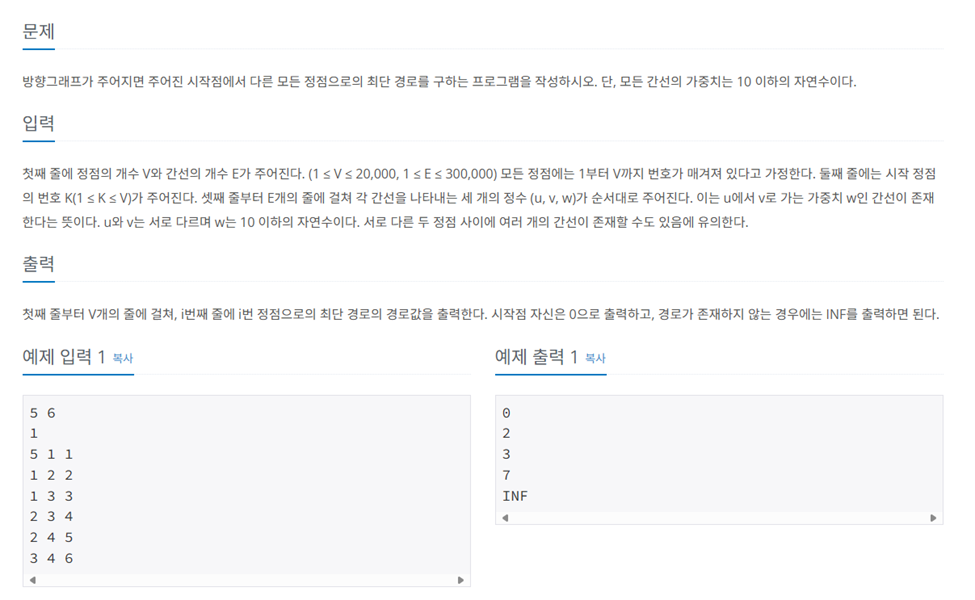
>
>  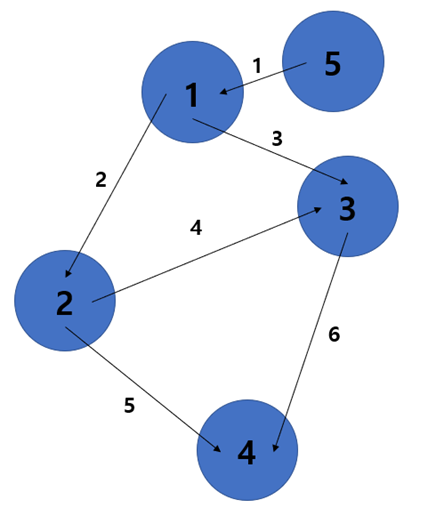
>
> [예제 입력]   
> 첫째 줄: 5 6 은 5개의 섬과 6개의 도로가 있음을 의미   
> 둘째 줄: 1 은 시작지점이 섬 1임을 의미    
> 5 1 1 -> 5에서 1로 가는 가중치 1인 간선이 존재    
> 1 2 2 -> 1에서 2로 가는 가중치 2인 간선이 존재    
> 1 3 3 -> 1에서 3으로 가는 가중치 3인 간선이 존재  
> 2 3 4 -> 2에서 3으로 가는 가중치 4인 간선이 존재  
> 2 4 5 -> 2에서 4로 가는 가중치 5인 간선이 존재    
> 3 4 6 -> 3에서 4로 가는 가중치 6인 간선이 존재    
>   
> [예제 출력]   
> 시작 섬 (여기서는 1)에서부터 i섬(i=1,2,3,4,5)으로 가는 최단 경로값 출력   
> 가령 1에서 4섬으로 가는 최단경로값은  
> 1->2->4 이므로 2+5=7  
> 1에서 5섬으로 가는 최단경로는 없으므로 INF    
>   
> 💡 아이디어:
> - 거리 기준으로 (cost, node)를 최소힙에 넣고, 최소 비용 노드부터 탐색
> - (현재까지 비용, 노드)를 최소힙에 넣는다.
> - 이미 방문한 노드는 스킵. 인접 노드 갱신.
```python
import heapq

def dijkstra(start, graph, n):
    INF = float('inf')	# 무한대를 표현. 도달할 수 없는 경우를 표현하기 위해 사용
    dist = [INF] * (n + 1)  # dist[i]:start에서i번 노드까지의 최단거리를 저장하는 리스트
    dist[start] = 0		    # 초기에는 모두 ∞로 설정하지만, start는 자기 자신이므로 거리 0
    heap = [(0, start)]  	# (비용, 노드)  
	# 우선순위 큐(힙)를 사용하여, 가장 비용이 적은 경로부터 처리함
    # (현재까지의 비용, 현재 노드) 형태의 튜플을 힙에 넣음
    # 최소힙이니까, 항상 비용이 가장 적은 경로부터 뽑히게 됨

    while heap:
        cost, now = heapq.heappop(heap)	# 현재까지 가장 비용이 작은 경로를 힙에서 꺼냄
        if cost > dist[now]:
            continue		
        # 이미 더 짧은 경로로 now에 도달한 적이 있다면 지금 꺼낸 건 쓸모없는 경로이므로 스킵
        # 예시: start → A → B 경로보다  start → B 경로가 더 빠르면, A → B 경로는 무시

        for neighbor_cost, neighbor in graph[now]: 	# 현재 노드 now에서 갈 수 있는 
                                                # 모든 이웃 노드들에 대해 반복
                                                # 각 이웃까지의 이동 비용과 이웃 노드 번호를 확인
            new_cost = cost + neighbor_cost	# 현재 노드를 거쳐 이웃 노드로 가는 누적 비용 계산
            if new_cost < dist[neighbor]:
                dist[neighbor] = new_cost	# 더 짧은 경로 발견! → dist 갱신
                heapq.heappush(heap, (new_cost, neighbor))	# 그 경로도 앞으로 탐색해야 하므로 힙에 넣음

    return dist

# 예시: 1번 노드에서 시작하는 그래프
n = 5
graph = {
    1: [(2, 2), (3, 3)],
    2: [(4, 4)],
    3: [(1, 4), (2, 5)],
    4: [],
    5: []
}

distances = dijkstra(1, graph, n)
# graph[1] → 노드 1에서 노드 2로 비용 2, 노드 3으로 비용 3
print(distances[1:])  # → [0, 2, 3, 6, 5]
```
---
✅ 힙 알고리즘 문제 풀이 팁
|팁|	설명|
|---|---|
|힙에는 튜플을 넣을 수 있다	|(우선순위, 실제값)으로 활용 가능|
|최대힙은 $(-)$값으로|	`heapq`는 최소힙만 지원하므로 `-x`로 넣고 `-heappop()`|
|정렬 없이 Top-K|	`heapq.nlargest()`, `nsmallest()`로 빠르게 해결 가능|
|시간복잡도 주의|	삽입/삭제는 $O(\log⁡{n})$이므로 $O(n\log⁡{n})$ 이상 요구될 때 힙이 적합



---

# **자료구조별 연산 정리**

참고: **파이썬에서 `인덱싱`(e.g. `lst[1]`)은 범위 초과에 오류가 발생하지만 `슬라이싱`(e.g. `lst[1:]`)은 범위 초과에도 오류가 없이 값이 없는 부분은 비어 있는 채로 반환한다.**   
$\quad\,\,\,\,$ 이는 모든 인덱싱/슬라이싱이 가능한 경우(`list`,`tuple`,`str`,`bytes`,`range`)에 대해 마찬가지이다.      
* `set`, `dict`의 경우 인덱싱/슬라이싱이 아예 불가

## **리스트(list) 연산 정리**

`ls1`, `ls2` 은 파이썬의 리스트 구조일 때,


<div align="left" style="font-family: Consolas;">

  |연산|최대 시간복잡도|예시|설명|
  |:---:|:---:|:---:|:------------------------------------|
  |Indexing|$O(1)$|`ls1[i]`|리스트의 특정 인덱스 `i`의 값 반환|
  |Storing|$O(1)$|`ls1[i] = x`|리스트의 특정 인덱스 `i`에 값 `x` 저장하기|
  |Append|$O(1)$|`ls1.append(x)`|리스트의 가장 뒤에 값 `x` 넣기|
  |Pop|$O(1)$|`ls1.pop()`<br>`== ls1.pop(-1)`|리스트의 가장 뒤에서 원소 제거하고 반환|
  ||$O(N)$|`ls.pop(i)`|리스트의 특정 인덱스 `i`의 원소 꺼내고 제거하고 반환|
  |Length|$O(1)$|`len(ls1)`|리스트의 길이 반환|
  |Clear|$O(1)$|`ls1.clear()`|리스트 내 모든 원소 제거하기|
  |Slicing|$O($`b`$-$`a`$)$|`ls1[a:b]`|리스트에서 인덱스 `a`부터 `b-1`까지의 원소만 꺼내 새로운 리스트로 반환|
  |Extend|$O(len($`ls2`$))$|`ls1.extend(ls2)`|기존 리스트에 다른 리스트를 이어붙여 반환|
  |Insertion|$O(N)$|`ls1.insert(i,x)`|리스트의 특정 인덱스 `i`에 값 `x` 저장하기|
  |Delete|$O(N)$|`del ls1[i]`|리스트 내 인덱스 `i`의 원소 제거하기|
  |Construction|$O(len($`ls2`$))$|`list(data)`|`data`의 원소들을 리스트로 만들기 <br> (단, `data`의 타입은 `iterable`이어야 함 - `int`, `float`, `boolean`, `None` 등은 iterable이 아니기 때문에 변환 불가)|
  |In|$O(N)$|`x in ls1:`|원소 `x`가 리스트에 존재하는지 `boolean`반환|
  |Not in|$O(N)$|`x not in ls1:`|원소 `x`가 리스트에 존재하지 않는지 `boolean`반환|
  |Remove|$O(N)$|`ls1.remove(x)`|리스트 내에 가장 처음으로 등장하는 원소 `x`를 삭제|
  |Copy|$O(N)$|`ls1.copy()`<br>`ls1.deepcopy()`|리스트를 복제하여 반환 (얕은복사 - 자료가 1차원일 때는 문제 없으나 2차원 이상일 때 안쪽 원소를 바꾸면 원본도 바뀜)<br> 리스트를 복제하여 반환 (깊은복사 - 모든 중첩 객체까지 복사하므로 서로 완전히 독립적)|
  |Min|$O(N)$|`min(ls1)`|리스트 내에 존재하는 가장 작은 원소 반환|
  |Max|$O(N)$|`max(ls1)`|리스트 내에 존재하는 가장 큰 원소 반환|
  |Iteration|$O(N)$|`for x in ls1:`|리스트 내에 존재하는 모든 원소 순회|
  |Multiply|$O(k\times N)$|`ls1 * k`|리스트를 `k`번 반복하여 길게 만들기|
  |Sort|$O(NlogN)$|`ls1.sort()` <br> `sorted(ls1)`|리스트 내 존재하는 원소를 정렬|

</div>
 


<br>

- `list(data)` 에 들어갈 수 있는 자료형

  
<div align="left" style="font-family: Consolas;">

| 자료형          | 예시                            | 변환 결과                    |
| ------------ | ----------------------------- | ------------------------ |
| 문자열 `str`    | `list("abc")`                 | `['a', 'b', 'c']`        |
| 튜플 `tuple`   | `list((1, 2, 3))`             | `[1, 2, 3]`              |
| 집합 `set`     | `list({4, 5, 6})`             | `[4, 5, 6]` (순서는 불확정)    |
| 딕셔너리 `dict`  | `list({'a':1, 'b':2})`        | `['a', 'b']` (key만 리스트됨) |
| range        | `list(range(3))`              | `[0, 1, 2]`              |
| enumerate    | `list(enumerate(['a', 'b']))` | `[(0, 'a'), (1, 'b')]`   |
| zip          | `list(zip([1,2],[3,4]))`      | `[(1, 3), (2, 4)]`       |
| map/filter 등 | `list(map(str, [1,2]))`       | `['1', '2']`             |

</div>

## **문자열(str) 연산 정리**

str1, str2는 파이썬의 문자열 자료형일 때,

<div align="left" style="font-family: Consolas;">


|       연산      |             예시            | 설명                                               |
| :-----------: | :-----------------------: | :----------------------------------------------- |
|    Indexing   |         `str1[i]`         | 문자열에서 인덱스 `i`에 해당하는 문자 반환                        |
|    Slicing    |        `str1[a:b]`        | 문자열에서 인덱스 `a`부터 `b-1`까지의 부분 문자열 반환               |
| Concatenation |       `str1 + str2`       | 두 문자열을 이어붙여 새로운 문자열 반환                           |
|   Repetition  |         `str1 * k`        | 문자열을 `k`번 반복하여 새로운 문자열 생성                        |
|     Length    |        `len(str1)`        | 문자열의 길이 반환                                       |
|   Lowercase   |       `str1.lower()`      | 문자열을 모두 소문자로 변환                                  |
|   Uppercase   |       `str1.upper()`      | 문자열을 모두 대문자로 변환                                  |
|   Titlecase   |       `str1.title()`      | 문자열에서 각 단어의 첫 글자를 대문자로 변환                        |
|    Swapcase   |     `str1.swapcase()`     | 문자열에서 소문자는 대문자로, 대문자는 소문자로 변환                    |
|      Find     |      `str1.find(sub)`     | 문자열에서 `sub`가 처음 나타나는 인덱스를 반환 (없으면 `-1` 반환)       |
|     Rfind     |     `str1.rfind(sub)`     | 문자열에서 `sub`가 마지막으로 나타나는 인덱스를 반환 (없으면 `-1` 반환)    |
|     Count     |     `str1.count(sub)`     | 문자열에서 `sub`의 등장 횟수를 반환                           |
|    Replace    |  `str1.replace(old, new)` | 문자열에서 `old`를 `new`로 바꾼 새로운 문자열 반환                |
|     Split     |    `str1.split(delim)`    | 문자열을 구분자 `delim`을 기준으로 분리하여 리스트로 반환              |
|      Join     |     `delim.join(str1)`    | 구분자 `delim`을 사용하여 문자열 `str1`의 원소를 합친 새로운 문자열 반환  |
|     Strip     |       `str1.strip()`      | 문자열 양옆의 공백 또는 특정 문자를 제거한 새로운 문자열 반환              |
|     Lstrip    |      `str1.lstrip()`      | 문자열 왼쪽의 공백 또는 특정 문자를 제거한 새로운 문자열 반환              |
|     Rstrip    |      `str1.rstrip()`      | 문자열 오른쪽의 공백 또는 특정 문자를 제거한 새로운 문자열 반환             |
|   Startswith  | `str1.startswith(prefix)` | 문자열이 `prefix`로 시작하는지 확인 (True/False 반환)          |
|    Endswith   |  `str1.endswith(suffix)`  | 문자열이 `suffix`로 끝나는지 확인 (True/False 반환)           |
|       In      |       `sub in str1`       | `sub`가 문자열 `str1`에 포함되어 있는지 확인 (True/False 반환)   |
|     Not in    |     `sub not in str1`     | `sub`가 문자열 `str1`에 포함되어 있지 않은지 확인 (True/False) 반환 |
|    Isdigit    |      `str1.isdigit()`     | 문자열이 숫자로만 구성되어 있는지 확인 (True/False 반환)            |
|    Isalpha    |      `str1.isalpha()`     | 문자열이 알파벳 문자로만 구성되어 있는지 확인 (True/False 반환)        |
|    Isalnum    |      `str1.isalnum()`     | 문자열이 알파벳 문자 또는 숫자만으로 구성되어 있는지 확인 (True/False) 반환) |
|    Isupper    |      `str1.isupper()`     | 문자열이 모두 대문자인지 확인 (True/False 반환)                 |
|    Islower    |      `str1.islower()`     | 문자열이 모두 소문자인지 확인 (True/False 반환)                 |
|    Isdigit    |      `str1.isdigit()`     | 문자열이 숫자만 포함되어 있는지 확인 (True/False 반환)             |
|    Isspace    |      `str1.isspace()`     | 문자열이 공백 문자로만 이루어져 있는지 확인 (True/False 반환)         |
|     Zfill     |    `str1.zfill(width)`    | 문자열의 길이가 `width`가 될 때까지 앞에 `0`을 채워 새로운 문자열 반환    |

</div>

## **집합(set) 연산 정리**

`set1`, `set2` 는 파이썬의 셋(Set) 자료형일 때,

<div align="left" style="font-family: Consolas;">

|          연산          |                         예시                         | 설명        |
| :------------------: | :------------------------------------------------: | :------------------------------------------------------- |
|       Indexing       |                      `set1[i]`                     | 셋은 인덱싱을 지원하지 않음 (에러 발생)  |
|          Add         |                    `set1.add(x)`                   | 셋에 원소 `x` 추가하기 (중복된 값은 추가되지 않음) |
|        Remove        |                  `set1.remove(x)`                  | 셋에서 원소 `x`를 제거하기 (원소가 없으면 KeyError 발생)     |
|        Discard       |                  `set1.discard(x)`                 | 셋에서 원소 `x`를 제거하기 (원소가 없으면 에러 발생하지 않음)      |
|          Pop         |                    `set1.pop()`                    | 셋에서 임의의 원소 하나를 제거하고 반환 (셋은 순서가 없기 때문에 어떤 원소가 나올지 알 수 없음) |
|         Clear        |                   `set1.clear()`                   | 셋 내 모든 원소 제거하기     |
|         Union        |     `set1 \| set2` <br> `set1.union(set2)`         | 셋 `set1`과 `set2`의 합집합 반환 |
|     Intersection     |     `set1 & set2`<br>`set1.intersection(set2)`     | 셋 `set1`과 `set2`의 교집합 반환    |
|      Difference      |      `set1 - set2`<br>`set1.difference(set2)`      | 셋 `set1`에만 있는 원소 반환        |
| Symmetric Difference | `set1 ^ set2`<br>`set1.symmetric_difference(set2)` | 셋 `set1`과 `set2`에서 하나에만 있는 원소 반환  |
|        Subset        |  `set1 <= set2` <br> `set1.issubset(set2)`         | 셋 `set1`이 셋 `set2`의 부분집합인지 확인 (True/False 반환) |
|       Superset       |  `set1 >= set2` <br> `set1.issuperset(set2)`       | 셋 `set1`이 셋 `set2`의 상위집합인지 확인 (True/False 반환)  |
|       Equality       |                   `set1 == set2`                   | 셋 `set1`과 `set2`가 동일한 원소를 가졌는지 확인 (True/False 반환)   |
|         Copy         |                    `set1.copy()`                   | 셋을 복제하여 반환 (얕은 복사)   |
|          In          |                     `x in set1`                    | 원소 `x`가 셋에 존재하는지 확인 (True/False 반환)    |
|        Not in        |                   `x not in set1`                  | 원소 `x`가 셋에 존재하지 않는지 확인 (True/False) 반환      |
|        Length        |                     `len(set1)`                    | 셋의 원소 개수 반환       |

</div>

## **딕셔너리(dict) 연산 정리**

`dict1`, `dict2`는 파이썬의 딕셔너리 자료형일 때,

<div align="left" style="font-family: Consolas;">

|     연산    |                 예시                | 설명                                                            |
| :-------: | :-------------------------------: | :------------------------------------------------------------ |
|  Indexing |            `dict1[key]`           | 딕셔너리에서 `key`에 해당하는 값을 반환                                      |
|  Storing  |        `dict1[key] = value`       | 딕셔너리에서 `key`에 해당하는 값을 `value`로 저장                             |
|    Get    |          `dict1.get(key)`         | 딕셔너리에서 `key`에 해당하는 값을 반환 (없으면 `None` 반환, 기본값 지정 가능)           |
|    Pop    |          `dict1.pop(key)`         | 딕셔너리에서 `key`에 해당하는 원소를 제거하고 반환                                |
|  Popitem  |         `dict1.popitem()`         | 딕셔너리에서 마지막으로 추가된 `key, value` 쌍을 제거하고 반환                      |
|    Keys   |           `dict1.keys()`          | 딕셔너리의 모든 `key`를 반환 (리스트 형태는 아니지만 순회 가능)                       |
|   Values  |          `dict1.values()`         | 딕셔너리의 모든 `value`를 반환                                          |
|   Items   |          `dict1.items()`          | 딕셔너리의 모든 `key, value` 쌍을 튜플 형태로 반환                            |
|   Update  |       `dict1.update(dict2)`       | 딕셔너리 `dict2`의 항목을 `dict1`에 추가 (겹치는 `key`는 `dict2`의 값으로 덮어씌워짐) |
|   Length  |            `len(dict1)`           | 딕셔너리의 원소 개수 반환 (키-값 쌍의 개수)                                    |
|   Clear   |          `dict1.clear()`          | 딕셔너리 내 모든 항목을 제거                                              |
|    Copy   |           `dict1.copy()`          | 딕셔너리의 얕은 복사본을 반환                                              |
|     In    |           `key in dict1`          | `key`가 딕셔너리 `dict1`에 존재하는지 확인 (True/False 반환)                 |
|   Not in  |         `key not in dict1`        | `key`가 딕셔너리 `dict1`에 존재하지 않는지 확인 (True/False 반환)              |
|  Equality |          `dict1 == dict2`         | 두 딕셔너리 `dict1`과 `dict2`가 동일한 `key-value` 쌍을 가지고 있는지 확인        |
| Iteration | `for key, value in dict1.items()` | 딕셔너리 내의 `key-value` 쌍을 순회                                     |

</div>

## **정수(int) 연산 정리** (비트 연산 추가)

int1, int2는 파이썬의 정수 자료형일 때, 

<div align="left" style="font-family: Consolas;">

|    연산    |              예시              | 설명                    |
| :------: | :--------------------------: | :------- |
|    덧셈    |         `int1 + int2`        | 두 정수의 합을 반환   |
|    뺄셈    |         `int1 - int2`        | 두 정수의 차를 반환 |
|    곱셈    |         `int1 * int2`        | 두 정수의 곱을 반환 |
|    나눗셈   |         `int1 / int2`        | 두 정수의 나눗셈 결과를 실수로 반환   |
|     몫    |        `int1 // int2`        | 두 정수의 나눗셈 결과에서 몫을 반환     |
|    나머지   |         `int1 % int2`        | 두 정수의 나눗셈 결과에서 나머지를 반환    |
|   거듭제곱   |        `int1 ** int2`        | `int1`을 `int2`번 거듭제곱한 값을 반환    |
|    절댓값   |          `abs(int1)`         | 정수의 절댓값 반환    |
|   부호 반전  |            `-int1`           | 정수의 부호를 반전시킨 값을 반환   |
|  비트 OR   |         `int1 \| int2`       | 두 정수의 비트 단위 OR 연산을 반환 <br> **예시**: `int1 = 5 (0101), int2 = 3 (0011)` $\Rightarrow$ `int1 \| int2 = 7 (0111)` <br> **설명**: 두 수의 각 비트 중 하나라도 1이면 결과가 1. 따라서 5와 3의 비트 연산에서 7이 나옴.|
|  비트 AND  |         `int1 & int2`        | 두 정수의 비트 단위 AND 연산을 반환 <br> **예시**: `int1 = 5 (0101), int2 = 3 (0011)` $\Rightarrow$ `int1 & int2 = 1 (0001)` <br> **설명**: 두 수의 각 비트가 모두 1일 때만 결과가 1. 5와 3의 비트 연산에서 1만 남게 됨.      |
|  비트 XOR  |         `int1 ^ int2`        | 두 정수의 비트 단위 XOR 연산을 반환 <br> **예시**: `int1 = 5 (0101), int2 = 3 (0011)` $\Rightarrow$ `int1 ^ int2 = 6 (0110)` <br> **설명**: 두 수의 비트가 다를 때만 1을 반환. 5와 3을 XOR 연산한 결과는 6.              |
|  비트 NOT  |            `~int1`           | 정수의 비트 단위 NOT 연산을 반환 <br> **예시**: `int1 = 5 (0101)` $\Rightarrow$ `~int1 = -6 (1010)` (2의 보수) <br> **설명**: 비트를 반전시킴.  |
|  왼쪽 시프트  |        `int1 << int2`        | `int1`을 왼쪽으로 `int2` 비트만큼 시프트 <br> **예시**: `int1 = 5 (0101), int2 = 2` $\Rightarrow$ `int1 << int2 = 20 (10100)` <br> **설명**: 5의 비트를 왼쪽으로 2비트 시프트하면 20. <br> 왼쪽 시프트는 비트로 표현된 int1을 int2만큼 왼쪽으로 밀고, 빈 오른쪽공간에 0을 채우는 것. <br> 이 연산은 int1을 2의 int2제곱만큼 곱하는 것과 같음. |
|  오른쪽 시프트 |        `int1 >> int2`        | `int1`을 오른쪽으로 `int2` 비트만큼 시프트 <br> **예시**: `int1 = 5 (0101), int2 = 2` $\Rightarrow$ `int1 >> int2 = 1 (0001)` <br> **설명**: 5의 비트를 오른쪽으로 2비트 시프트하면 1. <br> 오른쪽 시프트는 비트로 표현된 int1을 int2만큼 오른쪽으로 밀고, 빈 왼쪽공간에 부호 비트(음수인 경우 1, 양수인 경우 0)를 채우는 것. <br> 이 연산은 int1을 2의 int2제곱만큼 나누는 것과 같음.  |
|   정수 비교  |        `int1 == int2`        | 두 정수가 동일한지 확인 (True/False 반환)   |
|   정수 비교  |        `int1 != int2`        | 두 정수가 다른지 확인 (True/False 반환)     |
|   정수 비교  |         `int1 < int2`        | `int1`이 `int2`보다 작은지 확인 (True/False 반환)    |
|   정수 비교  |        `int1 <= int2`        | `int1`이 `int2`보다 작거나 같은지 확인 (True/False 반환) |
|   정수 비교  |         `int1 > int2`        | `int1`이 `int2`보다 큰지 확인 (True/False 반환)    |
|   정수 비교  |        `int1 >= int2`        | `int1`이 `int2`보다 크거나 같은지 확인 (True/False 반환)   |
| 정수 포함 여부 | `int1 in range(start, stop)` | `int1`이 `range(start, stop)` 범위에 포함되는지 확인 (True/False 반환)   |

</div>


---

### **참고: Bit(이진수의 최소단위)표현**

- 비트표현시 양수는 항상 맨 앞의 수가 0, 음수는 항상 맨 앞의 수가 1임.
> - 예시: 5를 4비트로 표현하면 단순히 `101`이 아닌 `0101`로 표시

- 2의 보수 표현     
2의 보수는 음수를 이진수로 표현할 때 사용됨.  
2의 보수는 양수의 이진수를 반전시키고, 그 결과에 1을 더하는 방식으로 음수를 표현함.
> - 예시: -5를 4비트로 표현하기     
[1] 먼저, 양수 5를 이진수로 나타냄: `5 = 0101`      
[2] 5를 반전시킵니다: `1010`        
[3] 반전된 값에 1을 더합니다: `1011`        

- 부호 확장 (Sign Extension)      
부호 확장은 음수의 부호 비트를 시프트한 후에도 그대로 유지하도록 하는 방법       
즉, 비트를 오른쪽으로 이동시킬 때,  **부호 비트(1)** 가 계속해서 앞부분을 채워 음수 특성을 유지함.       
>- 예시: `-7 >> 3 == -1`    
[1] -7를 2의 보수로 표현하면 `7 = 0111` 이므로 `-7 = 1001` 임   
[2] 오른쪽으로 세칸 시프트하면 `_ _ _ 1` 임     
[3] 왼쪽 빈 공간을 1로 채워야 하므로 `1111`임   
[4] 이를 양수로 변환시키기 위해 1을 빼고, 양수의 이진수로 변환시키면 `0001`이므로 1임. 즉, `1111`은 -1  